### 피마 당뇨병 데이터

In [109]:
library(tidyverse)
library(data.table)
library(gridExtra)
library(ggplot2)
library(RColorBrewer)
library(gridExtra)

In [2]:
data<-fread("diabetes.csv")

데이터에 있는 모든 개체들은 여자들임

In [3]:
head(data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [4]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

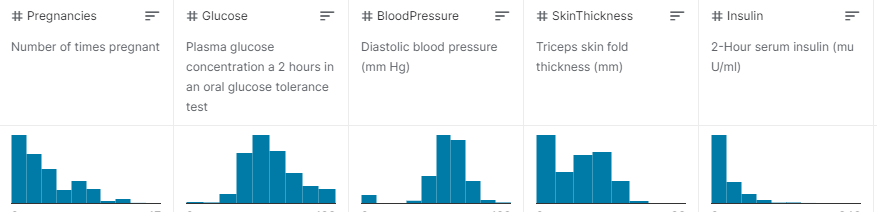

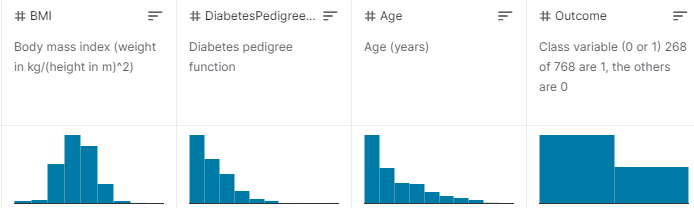

In [5]:
#임신경험 갯수세기
data[,.N,by = Pregnancies][order(desc(N))]

Pregnancies,N
<int>,<int>
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [102]:
# 나이 그룹별로 통게량 확인을 위해 나이 열 추가
data[,AgeGroup := Age %/% 10]
# BMI 그룹별로 나누는 변수 추가
data[,BMI_cat := ifelse(BMI < 18.5,"uw",ifelse(BMI<25,"nm",ifelse(BMI<30,"ow","ob")))]
# row index 추가
data[, idx := seq(1,768)]

In [103]:
data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat,idx
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>
6,148,72,35,0,33.6,0.627,50,1,5,ob,1
1,85,66,29,0,26.6,0.351,31,0,3,ow,2
8,183,64,0,0,23.3,0.672,32,1,3,nm,3
1,89,66,23,94,28.1,0.167,21,0,2,ow,4
0,137,40,35,168,43.1,2.288,33,1,3,ob,5
5,116,74,0,0,25.6,0.201,30,0,3,ow,6
3,78,50,32,88,31.0,0.248,26,1,2,ob,7
10,115,0,0,0,35.3,0.134,29,0,2,ob,8
2,197,70,45,543,30.5,0.158,53,1,5,ob,9


In [8]:
# 연령별 당뇨병 비율
data[Outcome == 1,.N,by = AgeGroup][order(AgeGroup)][,2] / data[AgeGroup != 8][,.N,AgeGroup][order(AgeGroup)][,2]
data[AgeGroup != 8][,.N,AgeGroup][order(AgeGroup)]

N
<dbl>
0.2121212
0.4606061
0.5508475
0.5964912
0.2758621
0.5000000


AgeGroup,N
<dbl>,<int>
2,396
3,165
4,118
5,57
6,29
7,2


20대와 60대의 당뇨 비율 낮고 30대와 50대 사이  
당뇨 비율이 높음

In [9]:
# BMI별 당뇨병 비율
data[Outcome == 1, .N, by = BMI_cat][order(BMI_cat)][,2] / data[,.N,by = BMI_cat][order(BMI_cat)][,2]
data[, .N, by = BMI_cat][order(BMI_cat)]

N
<dbl>
0.06862745
0.46398305
0.22346369
0.13333333


BMI_cat,N
<chr>,<int>
nm,102
ob,472
ow,179
uw,15


전반적으로 무게가 많이 나가는 사람이 많이 조사되었고,   
피마 인디언은 무게가 많이 나가는 사람이 많은가 보다.  
비만 --> 과체중 --> 저체중 --> 정상 순으로   
당뇨병 비율이 높았음.

In [10]:
#나이별 인슐린 수치 평균
data[,.(.N, mean_ins = mean(Insulin)),AgeGroup][order(AgeGroup)]

AgeGroup,N,mean_ins
<dbl>,<int>,<dbl>
2,396,84.39394
3,165,77.81212
4,118,63.89831
5,57,109.40351
6,29,41.06897
7,2,0.00000
8,1,60.00000


20대 400명 30대 165명 40대 118명 5060대 : 86명 7080대 : 3명   

In [95]:
scatter_d <- function(df, col1, col2, ...) {
    graph <- ggplot(df, aes(x = get(col1), y = get(col2))) + 
    geom_point(shape = 20, size = 5, aes(colour = factor(get(...)))) + 
    ggtitle(paste("Scatter Plot :",col1,"between",col2)) + 
    labs(colour = paste(...), x = col1, y = col2)
    
    graph + scale_fill_brewer(palette = "Set1")
    return(graph)
}

In [115]:
Boxplot <- function(df, col1) {
    graph <- ggplot(df, aes(x = 1, y = get(col1))) +
    geom_boxplot() +
    ggtitle(paste("Boxplot of",col1)) + 
    labs(x = "value", y = col1)
    
    return(graph)
}

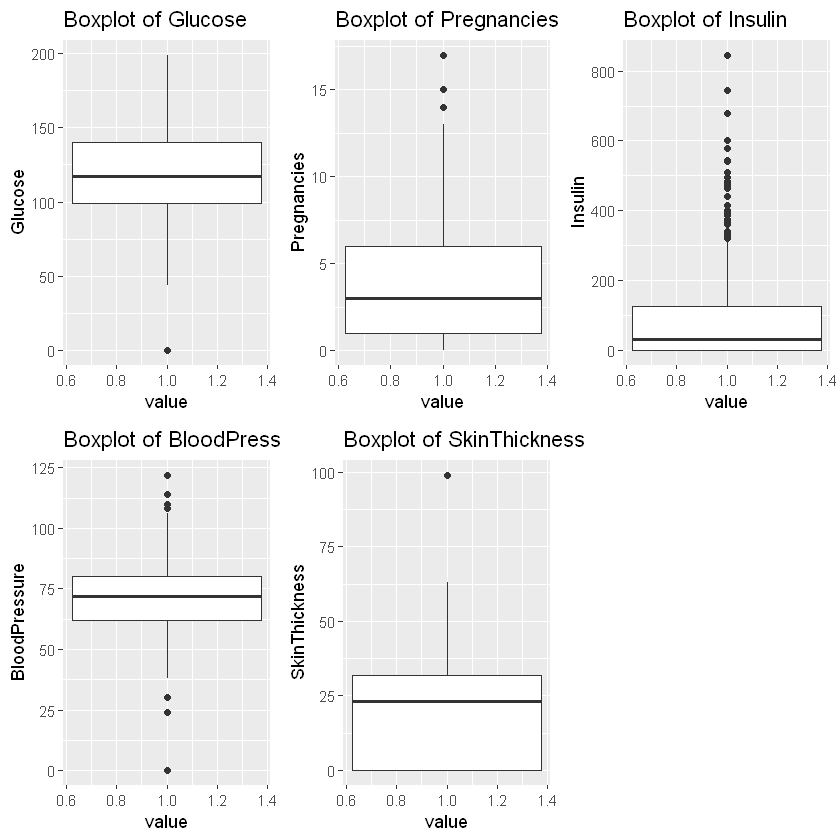

In [118]:
box_graph_list <- list()
cols <- c("Glucose", "Pregnancies", "Insulin", "BloodPressure",
         "SkinThickness")

for (i in 1:length(cols)){
  box_graph_list[[i]] = Boxplot(data, cols[i])
}

do.call("grid.arrange", c(box_graph_list, ncol = 3, nrow = 2))

혈압의 0의 개체수가 왜이렇게 많은지, 그리고 0이 너무 많아서 어떻게 처리를 해줘야 할 지...   
Insulin 역시 너무나도 극단값이 많아버리는 결과가 나왔음   
결측치 제거를 어떻게 할 것인가...!!   
일단 혈압같은 경우 label 별로 boxplot을 그린 다음    
median이나 mean으로 매꿔보면 어떨까 싶음   
임신, Insulin, SkinThickness, 혈압의 극단값을 삭제   

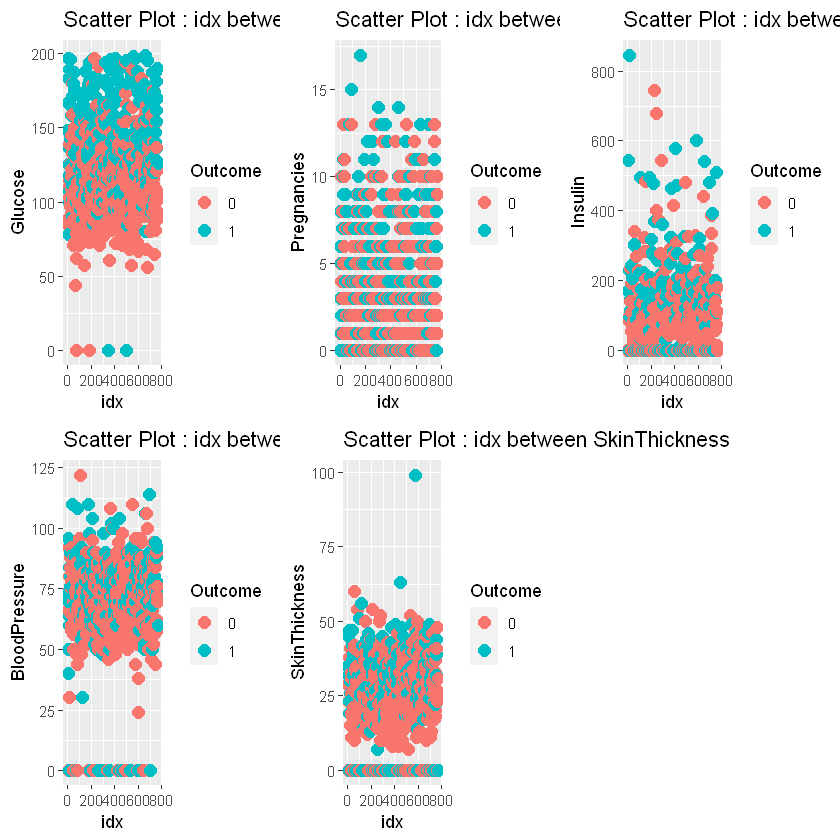

In [111]:
sca_graph_list <- list()
cols <- c("Glucose", "Pregnancies", "Insulin", "BloodPressure",
         "SkinThickness")

for (i in 1:length(cols)){
  sca_graph_list[[i]] = scatter_d(data, "idx", cols[i], "Outcome")
}

do.call("grid.arrange", c(sca_graph_list, ncol = 3, nrow = 2))

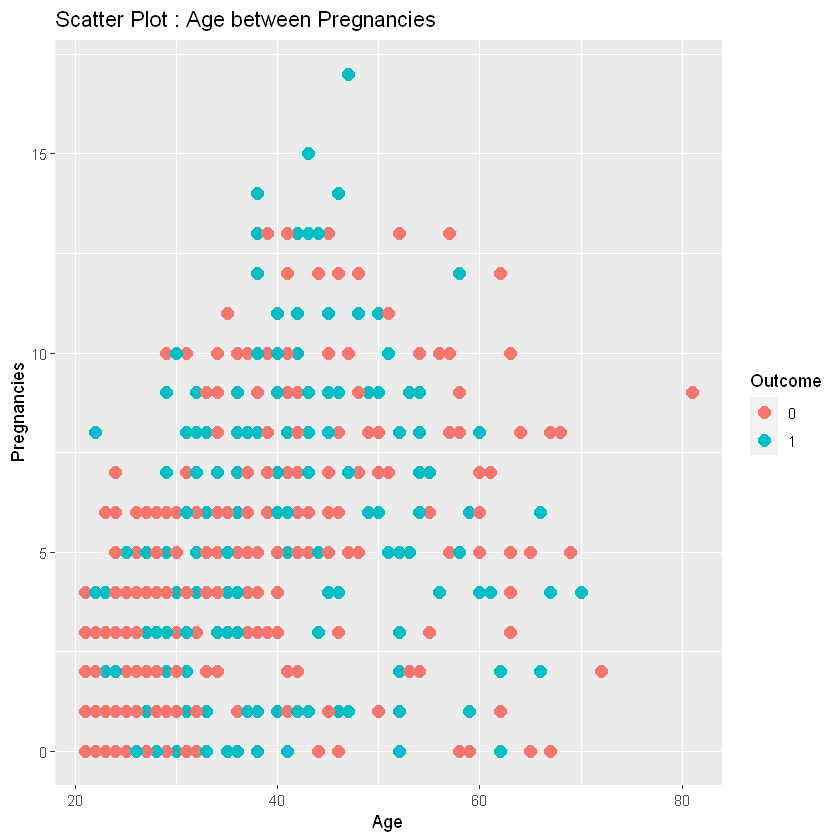

In [96]:
scatter_d(data, "Age", "Pregnancies","Outcome")

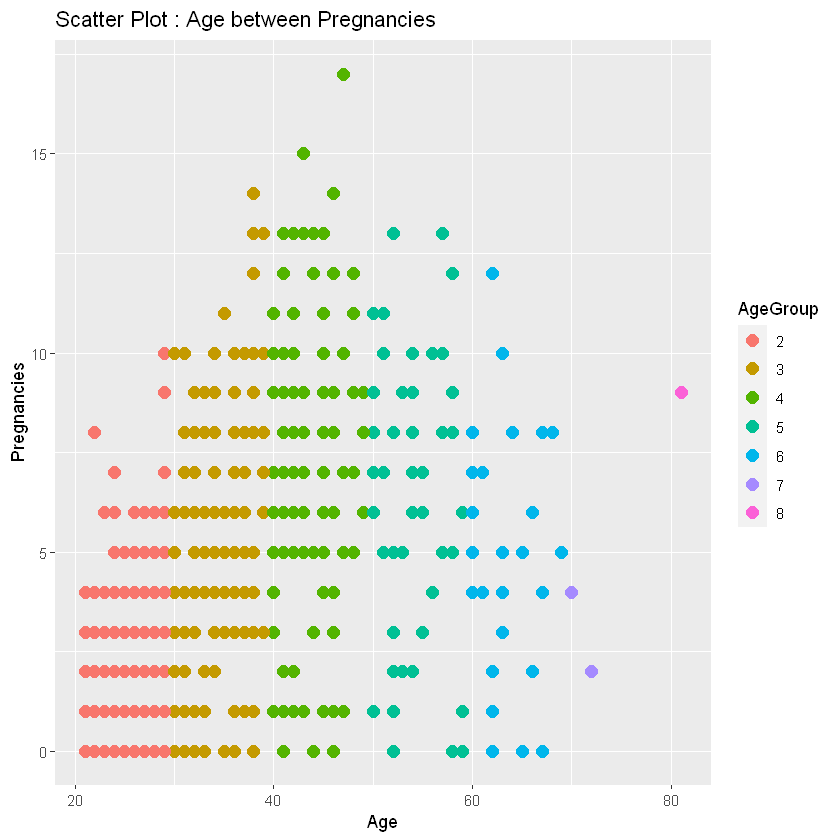

In [97]:
scatter_d(data, "Age","Pregnancies","AgeGroup")

In [50]:
head(data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
6,148,72,35,0,33.6,0.627,50,1,5,ob
1,85,66,29,0,26.6,0.351,31,0,3,ow
8,183,64,0,0,23.3,0.672,32,1,3,nm
1,89,66,23,94,28.1,0.167,21,0,2,ow
0,137,40,35,168,43.1,2.288,33,1,3,ob
5,116,74,0,0,25.6,0.201,30,0,3,ow


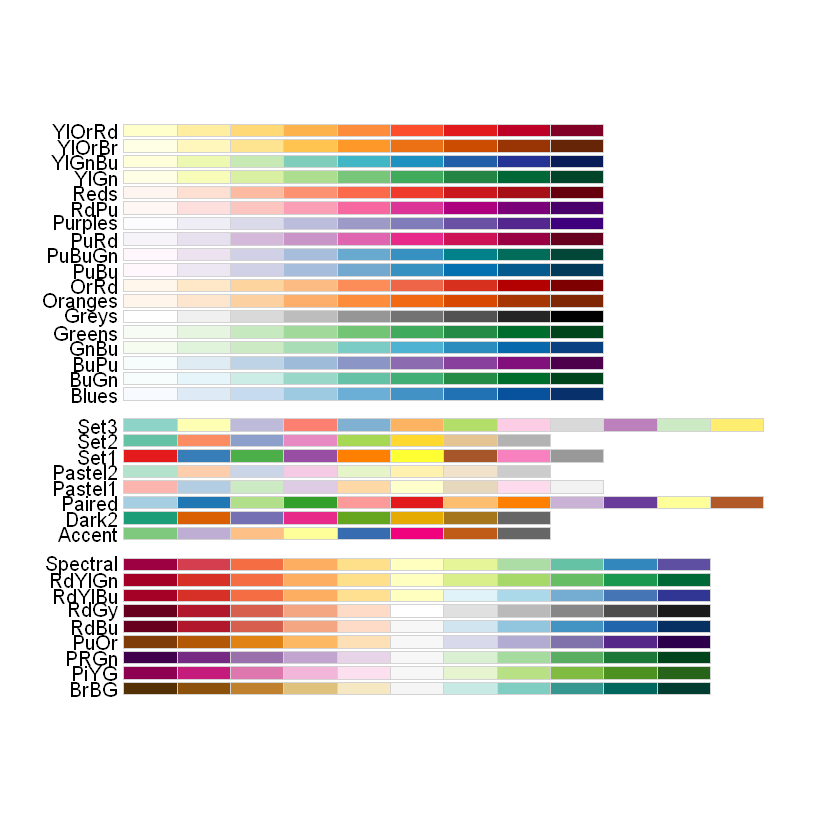

In [68]:
display.brewer.all()

In [ ]:
for (i in 1:length(category_wp)){
  wp_graph_list[[i]] = draw_bargraph(bf_wp, af_wp, category_wp[i])
}

In [55]:
head(data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
6,148,72,35,0,33.6,0.627,50,1,5,ob
1,85,66,29,0,26.6,0.351,31,0,3,ow
8,183,64,0,0,23.3,0.672,32,1,3,nm
1,89,66,23,94,28.1,0.167,21,0,2,ow
0,137,40,35,168,43.1,2.288,33,1,3,ob
5,116,74,0,0,25.6,0.201,30,0,3,ow
